# Song recommendation system
The main idea of recommendation system is to 
Approach demonstrated below uses PCA and t-SNE algorithms for dimensionality reduction. Search for simmilar songs is based on finding songs with shortest Euclidean/Manhattna distances.

## t-SNE algorithm
t-SNE algotirthm is used for dimensionality reduction. The key difference between t-SNE and PCA is that PCA is used for feature reduction and understanding the variance, while t-SNE is used for visualization and capturing local structures.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

data = pd.read_csv('KaggleDataset.csv')
data.head()
data.dropna(inplace = True)
data.info()
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

In [27]:
tsne = TSNE(n_components = 2, random_state = 1)
tsne_features = tsne.fit_transform(scaled_features[:500]) # the line below was used initially (for calculating reduced features) but it takes more time to run
#pca_features = pca.fit_transform(scaled_features)

In [28]:
#data['name'].nunique(), data.shape

In [29]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features[:500]) # the line below was used initially (for calculating reduced features) but it takes more time to run
#pca_features = pca.fit_transform(scaled_features)

In [30]:
#data['pca_x'] = pca_features[:,0]
#data['pca_y'] = pca_features[:,1]
#data['tsne_x'] = tsne_features[:,0]
#data['tsne_y'] = tsne_features[:,1]
#data.to_csv('kaggleDataset_reduced.csv',index=False)

# import dataset with reduced features
data = pd.read_csv('KaggleDataset_reduced.csv')

After experimenting with different reduction and distance algorithms it was discovered that the function ```recommend_tsne_euclidean``` perforemed the best. However, ```recommend_tsne_manhattan``` results are almost identical.

In [31]:
def recommend_pca_euclidean(trackID, num_recommendations=5):
    track = data[data['track_id'] == trackID]
    features = track[['pca_x', 'pca_y']].values
    
    distances = euclidean_distances(features, data[['pca_x','pca_y']])
    data['distance'] = distances[0]
    recommendations = data.sort_values('distance').head(num_recommendations+1)[1:]
    return recommendations[['track_id', 'track_name', 'artists', 'distance']]


In [32]:
def recommend_tsne_euclidean(trackID, num_recommendations=5):
    track = data[data['track_id'] == trackID]
    print(track)
    features = track[['tsne_x', 'tsne_y']].values
    
    distances = euclidean_distances(features, data[['tsne_x','tsne_y']])
    data['distance'] = distances[0]
    recommendations = data.sort_values('distance').head(num_recommendations+1)[1:]
    return recommendations[['track_id', 'track_name', 'artists', 'distance']]

In [33]:
def recommend_pca_manhattan(trackID, num_recommendations=5):
    track = data[data['track_id'] == trackID]
    features = track[['pca_x', 'pca_y']].values
    
    distances = manhattan_distances(features, data[['pca_x','pca_y']])
    data['distance'] = distances[0]
    recommendations = data.sort_values('distance').head(num_recommendations+1)[1:]
    return recommendations[['track_id', 'track_name', 'artists', 'distance']]

In [34]:
def recommend_tsne_manhattan(trackID, num_recommendations=5):
    track = data[data['track_id'] == trackID]
    features = track[['tsne_x', 'tsne_y']].values
    
    distances = manhattan_distances(features, data[['tsne_x','tsne_y']])
    data['distance'] = distances[0]
    recommendations = data.sort_values('distance').head(num_recommendations+1)[1:]
    return recommendations[['track_id', 'track_name', 'artists', 'distance']]

In [35]:
recommend_tsne_euclidean('35NyjYJFaJxqbUF2y0jWl1', 10)

      Unnamed: 0                track_id     artists  \
4788        4788  35NyjYJFaJxqbUF2y0jWl1  Aphex Twin   

                            album_name track_name  popularity  duration_ms  \
4788  Selected Ambient Works Volume II         #1          48       447800   

      explicit  danceability  energy  ...  instrumentalness  liveness  \
4788     False         0.619  0.0327  ...             0.712    0.0865   

      valence    tempo  time_signature  track_genre     pca_x     pca_y  \
4788   0.0785  102.884               4      ambient -4.310976  0.437258   

       tsne_x    tsne_y  
4788 -45.5545 -88.92977  

[1 rows x 25 columns]


,track_id,track_name,artists,distance
54003,0z7IeekUiNaQvmGQhsfJdl,After the Rain - Piano Solo,Kyson,0.132151
79981,27sZtnaLNm4O6YAjqUJxwI,Don't Start Now - Piano Version,Flying Fingers,0.431204
45155,5UkCU9C0YGZHNwPIcGD3Up,Struck By Clouds,Ivan Bielsa,0.486594
105269,3HU9ZNApVMhq8RmLFum4Mp,Aurora,Oscar Hollis,0.687284
45674,4JiJm5sCW2ha6D9QkTuS5O,CAN YOU CELEBRATE,Noriyasu Takeuchi,0.730283
45243,0nSda38ueNMdJgoSkwhC8u,Orchestral Suite No. 3- II. Air on a G String,Henrik Janson,0.819449
15549,2h2eJEBhngpmTKDwFuhhDi,Healing Touch,DaniSogen,0.840484
45965,2SvmLf1WGMevA1POgmsE1j,What Are You Doing the Rest of Your Life?,Viktor Kvist,0.922812
45310,06AgHpQ0hUM1BPDgIS4R9P,Vesuvio,Anila Mirela,0.971951
5830,13OOHdblP3IpX24DmidYeQ,"Uso (From ""Fullmetal Alchemist: Brotherhood"")",LoFoxy;Sakura,0.975318


In [36]:
recommend_tsne_euclidean('0aPrTlWUf2nmDkC9gcP5kZ')

      Unnamed: 0                track_id           artists  \
4375        4375  0aPrTlWUf2nmDkC9gcP5kZ  Boards of Canada   

                           album_name track_name  popularity  duration_ms  \
4375  Music Has The Right To Children      Olson          58        91706   

      explicit  danceability  energy  ...  liveness  valence   tempo  \
4375     False         0.223  0.0138  ...      0.13   0.0357  64.017   

      time_signature  track_genre     pca_x     pca_y    tsne_x   tsne_y  \
4375               4      ambient -6.657371 -0.688174 -67.15203 -90.6178   

       distance  
4375  21.663396  

[1 rows x 26 columns]


,track_id,track_name,artists,distance
101500,2IrOsuqSttz8KBastkZCzy,Pause,Serene & Pax,0.357826
101717,52uw4LhiFFnIHduoLVILMm,Sequoia,Klaangen,0.394607
101448,4cyNPLXUPnmLVvi6sf0LRL,White Noise - Res 700 hz,Granular,0.403998
101903,6mk4Fk0a1ZEQZTBBQBccIm,Ulayaw,Elise Ryen,0.437251
101501,7MRwNia7W4TCMUq1X8JbAU,The Other Side,Rosetta Arroyo,0.532190


In [37]:
recommend_tsne_euclidean('5qqabIl2vWzo9ApSC317sa', 10)

       Unnamed: 0                track_id artists  \
91913       91914  5qqabIl2vWzo9ApSC317sa   Oasis   

                                           album_name  \
91913  (What's The Story) Morning Glory? [Remastered]   

                    track_name  popularity  duration_ms  explicit  \
91913  Wonderwall - Remastered          78       258773     False   

       danceability  energy  ...  liveness  valence    tempo  time_signature  \
91913         0.378   0.896  ...     0.194    0.469  174.302               4   

       track_genre     pca_x     pca_y     tsne_x     tsne_y    distance  
91913         rock  1.410849 -1.477438  26.989107  12.052358  139.297218  

[1 rows x 26 columns]


,track_id,track_name,artists,distance
44798,66dpeKhmayj4OdsnfgO1Xh,Broken Glass,Buckcherry,0.091683
50061,7qimFcJMQ4pCqxLOCtEK3M,"Muere monstruo, muere",Almafuerte,0.331138
47802,1Ap9wotYS99H8R17VONySZ,We’ll Be Back,Megadeth,0.403275
44556,4qR4J8QRTeN0W8Rp5nVdzi,Come Undone,My Darkest Days,0.430146
104868,1jJn6iK6o2Vg7iUKHztRTk,El universo sobre mí,Amaral,0.438480
27650,5PuJ00qKGWqbGeeWbt8WJb,Heartbeat Loud,Andy C;Fiora,0.468253
86997,6zpBjeIne0jS2AVCElureG,Also stoßen wir an,Kapelle Petra,0.492105
39849,6zpBjeIne0jS2AVCElureG,Also stoßen wir an,Kapelle Petra,0.492442
85729,6zpBjeIne0jS2AVCElureG,Also stoßen wir an,Kapelle Petra,0.492908
72260,6wqMBrsXDJhwAaGi6DvJ2M,This is Halloween,Our Last Night,0.746763


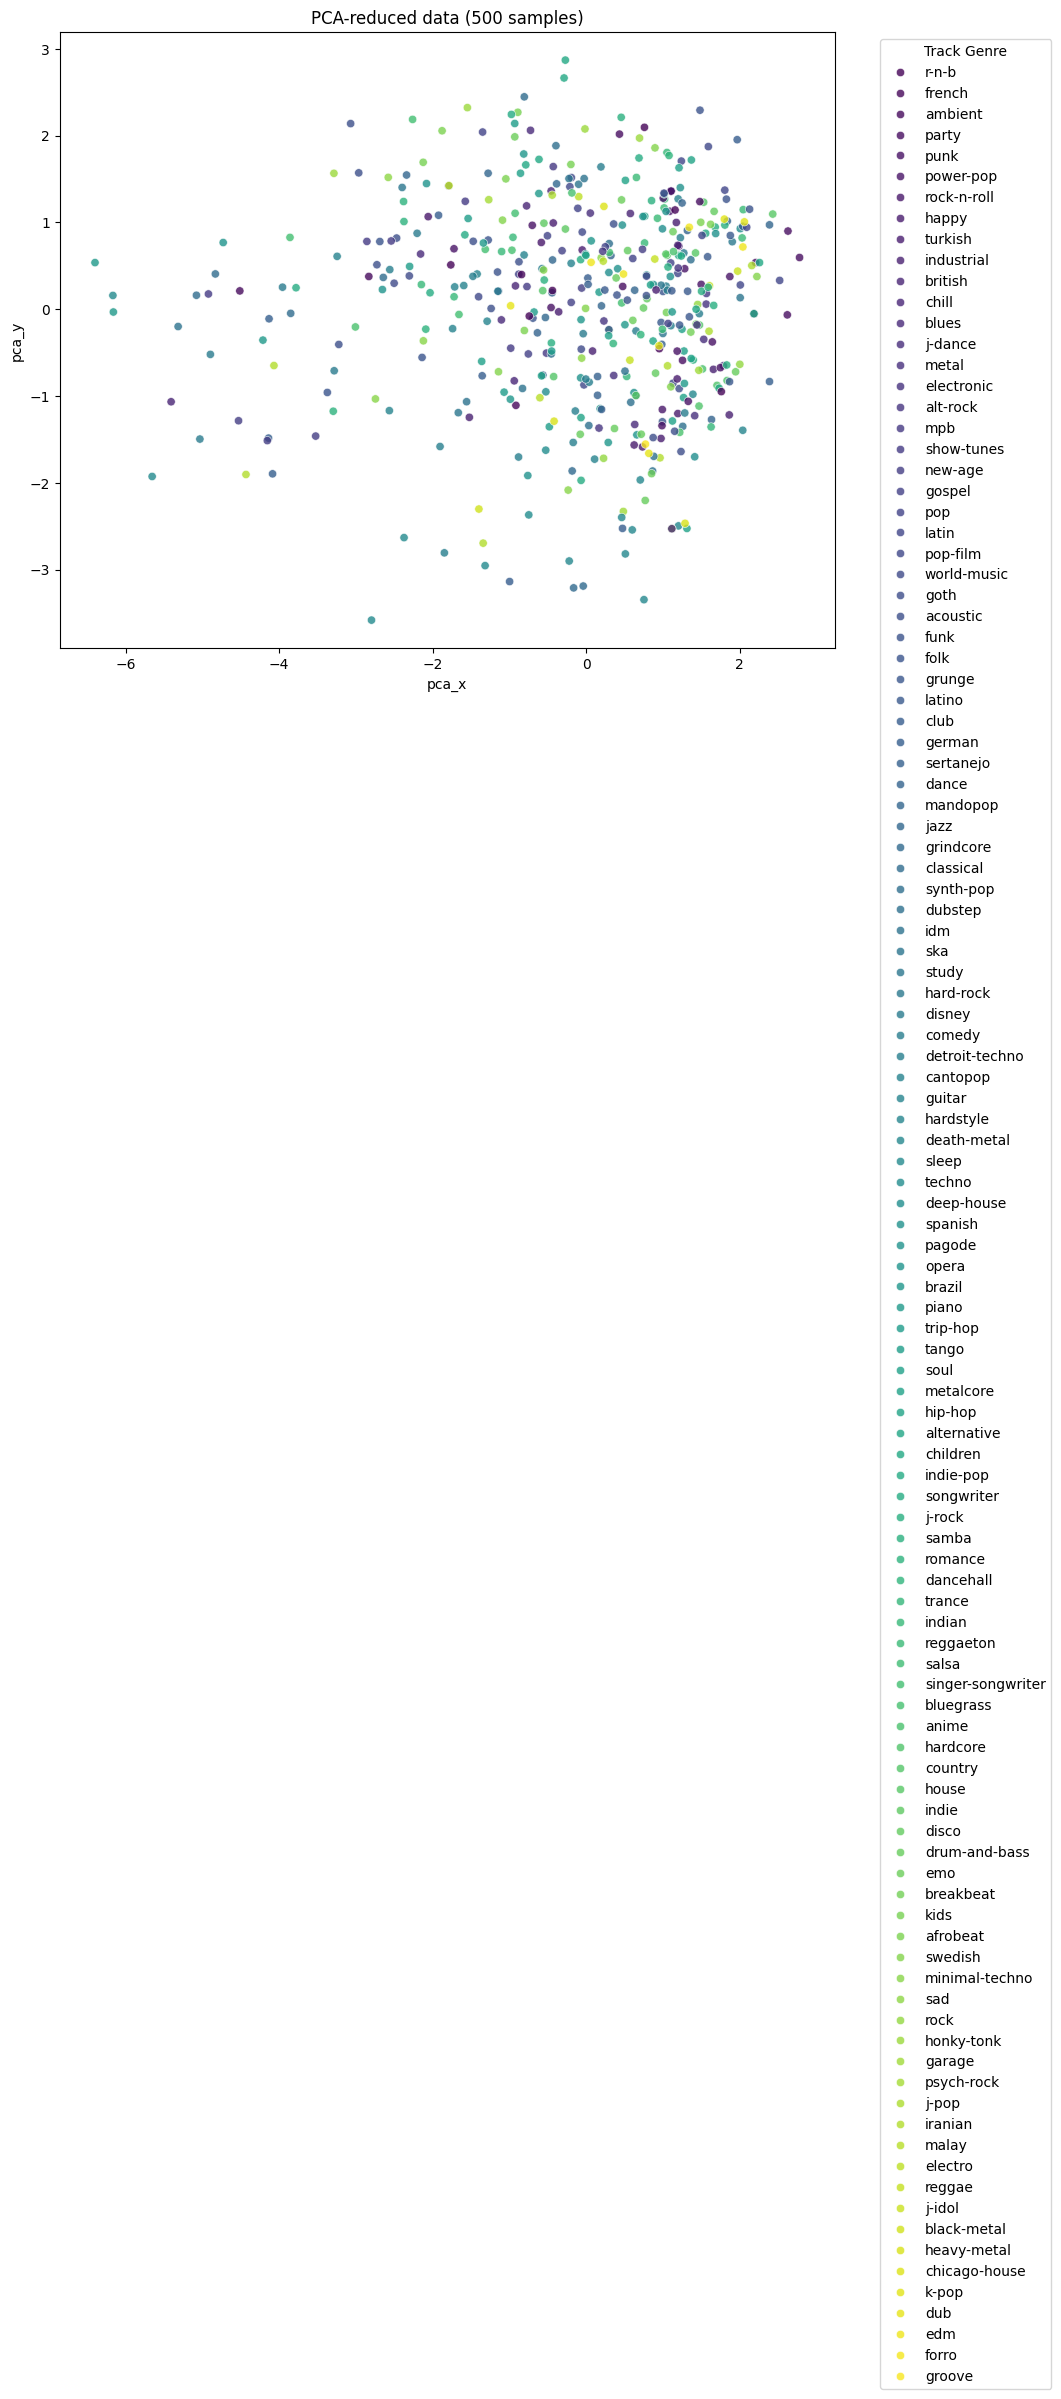

In [38]:
n = 500

samples = data.sample(n)
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='pca_x', y='pca_y', hue='track_genre', data=samples, palette='viridis', alpha=0.8)
scatter.set_title(f'PCA-reduced data ({n} samples)')
plt.legend(title='Track Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

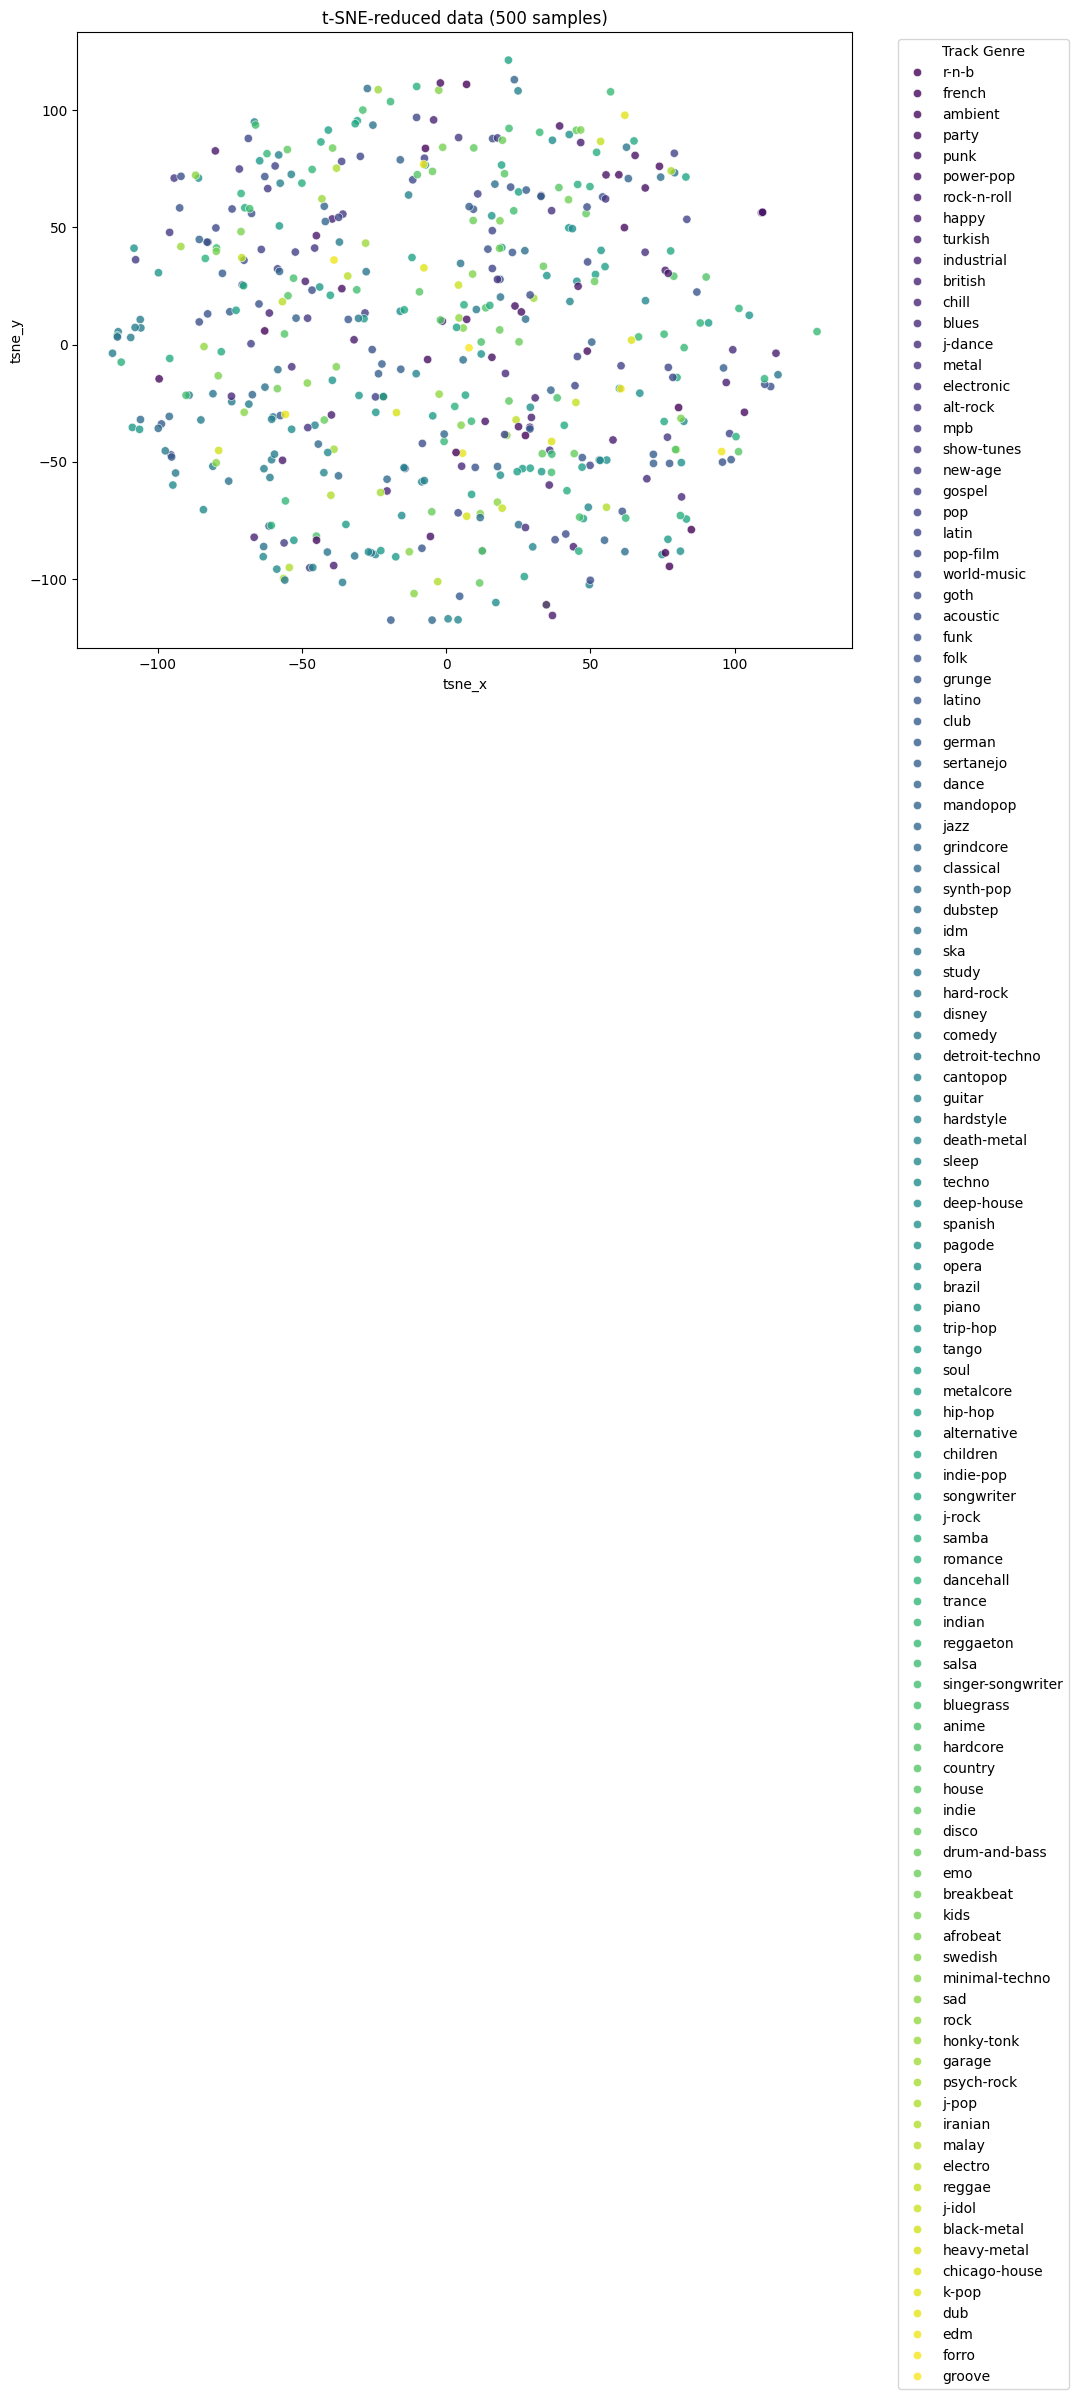

In [39]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='tsne_x', y='tsne_y', hue='track_genre', data=samples, palette='viridis', alpha=0.8)
scatter.set_title(f't-SNE-reduced data ({n} samples)')
plt.legend(title='Track Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Conclusion
Recommendations made with t-SNE reduction are more accurate and simmilar to input track. However the measurement of simmilarity between tracks is pure subjective metric. Sometimes recommendations can sound very different (for human ear) but numerically these tracks are very close to each other.